# 绘图

In [3]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## ZINC数据集元素分布

### 读取数据

In [2]:
# 读取数据文件,一个dict，key为dataset的名字，value为一个dict(total_molecule, total_atom{atom: num})
dataset_info_file = "../data/dataset/zinc20_druglike_dataset_info.pkl"
dataset_info = pickle.load(open(dataset_info_file, "rb"))

total_molecule_num = 0
total_atom_count = defaultdict(lambda: 0)
for k, v in dataset_info.items():
    total_molecule_num += v["total_molecule"]
    for atom, num in v["total_atom"].items():
        total_atom_count[atom] += num


### 绘制分布图

In [3]:
total_atom_count = dict(total_atom_count)

# 归一化
total_atom_num = sum(total_atom_count.values())
total_atom_count_p = {
    k: v / total_atom_num
    for k, v in sorted(total_atom_count.items(), key=lambda item: item[1], reverse=True)
    if k not in ["HD", "HH", "HE"]
}


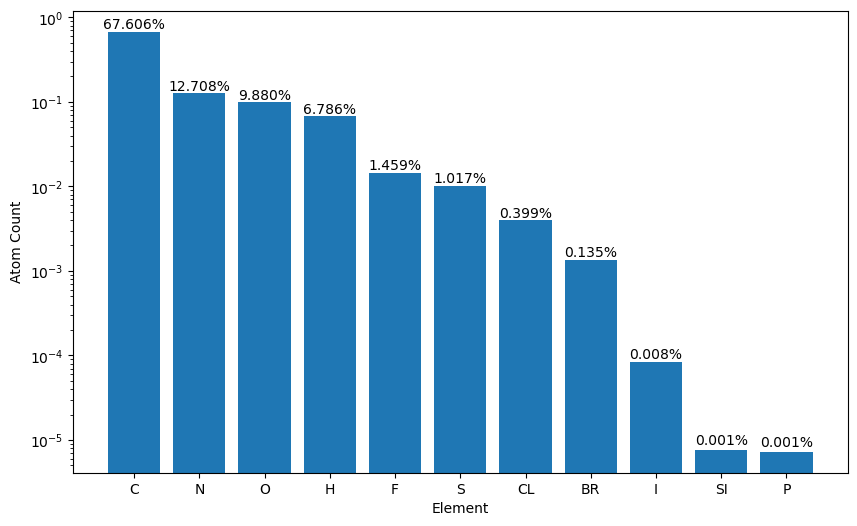

In [17]:
# 绘制漂亮的条形图
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(total_atom_count_p.keys(), total_atom_count_p.values())
# y轴的数值显示为百分比
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# 在每个柱子上显示具体的数值
for x, y in zip(total_atom_count_p.keys(), total_atom_count_p.values()):
    ax.text(x, y + 0.0000005, "{:.3%}".format(y), ha="center", va="bottom")
    
ax.set_xlabel("Element")
ax.set_ylabel("Atom Count")
# ax.set_title("ZINC20 Druglike Subset Atom Count")
# 对数坐标
ax.set_yscale("log")


# 保存为无背景的图片
plt.savefig("zinc20_druglike_atom_count.png")

### 中断坐标轴
绘制两个图，但是中间有一段空白，可以使用`brokenaxes`库，
参考：https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html

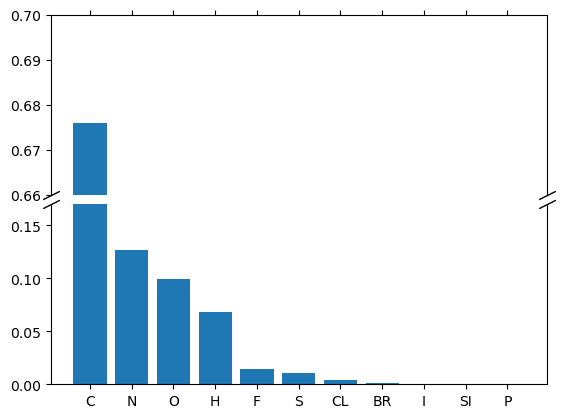

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(19680801)

# pts = np.random.rand(30)*.2
# # Now let's make two outlier points which are far away from everything.
# pts[[3, 14]] += .8


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
# ax1.plot(pts)
# ax2.plot(pts)
ax1.bar(total_atom_count_p.keys(), total_atom_count_p.values())
ax2.bar(total_atom_count_p.keys(), total_atom_count_p.values())

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.66, .7)  # outliers only
ax2.set_ylim(0, .17)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

## 重复对接变化趋势

### 读取数据

In [22]:
# 数据
pearson_raw = "0.9249	0.9302	0.9348	0.9329	0.9390	0.9341	0.9251	0.9497	0.9566	0.9618	0.9635	0.9645	0.9132	0.9518	0.9604	0.9645	0.9669	0.9669	0.8618	0.8963	0.9113	0.9222	0.9259	0.9306"
pearson = [float(i) for i in pearson_raw.split("\t")]
# 将pearson分为四份
pearson = [pearson[i:i+6] for i in range(0, len(pearson), 6)]
complex_id = ['3a6p', '4z4c', '4z4d', '6cbd']
exhaustiveness = [8, 16, 32, 64, 96, 128]


### 绘制折线图

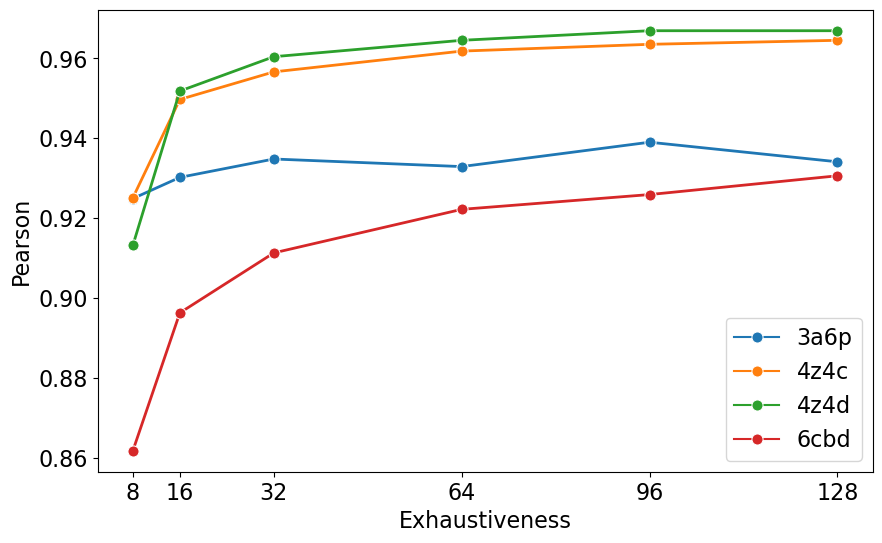

In [31]:
# 绘制漂亮的折线图
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(pearson)):
    sns.lineplot( x=exhaustiveness, y=pearson[i], label=complex_id[i], marker="o", ax=ax, markersize=8)
ax.set_xlabel("Exhaustiveness")
ax.set_ylabel("Pearson")
# 设置x轴的刻度
ax.set_xticks(exhaustiveness)
# ax.set_title("Repeat Dock Pearson")
ax.legend()
# 设置线的粗细
plt.setp(ax.lines, linewidth=2)
# 设置字体大小
plt.rcParams.update({'font.size': 16})


# 保存图片
plt.savefig("repeat_dock_pearson.png")

## 模型性能随训练数据量变化趋势

### 读取数据

In [1]:
complex_id = ['3a6p', '4z4c', '4z4d', '6cbd']
dataset_size_tick = ['100k', '300k', '500k', '700k', '870k']
dataset_size = [100, 300, 500, 700, 870]
val_pearson = [
    [0.9092, 0.9168, 0.92, 0.9209, 0.922],
    [0.9505, 0.9541, 0.9546, 0.9549, 0.9551],
    [0.9398, 0.9563, 0.9567, 0.9571, 0.956],
    [0.8909, 0.9057, 0.9063, 0.9102, 0.9107]
]
repeat_pearson = [0.9348, 0.9566, 0.9604, 0.9222]
color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

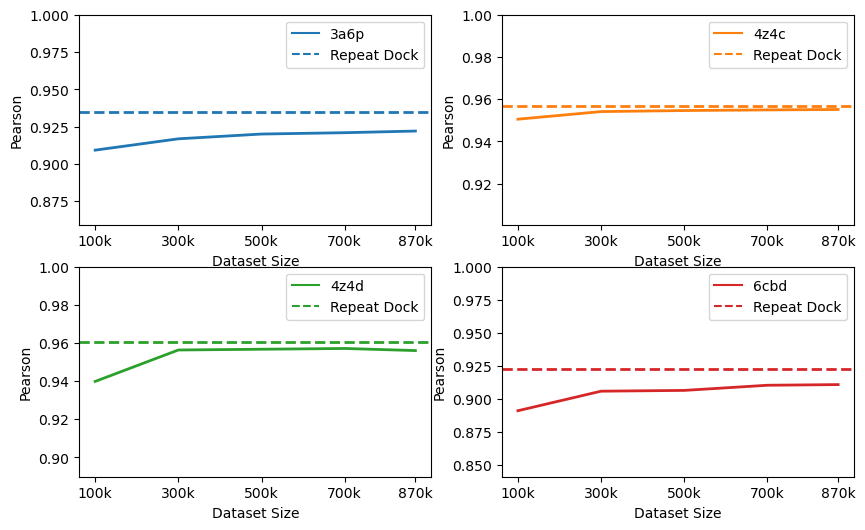

In [8]:
# 使用seaborn绘制折线图，以repeat dock为渐进参考，绘制田字格图
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
for i in range(len(complex_id)):
    row = i // 2
    col = i % 2
    sns.lineplot(
        x=dataset_size,
        y=val_pearson[i],
        ax=ax[row][col],
        color=color[i],
        label=complex_id[i]
    )
    # 设置y轴的上限为1.0，下限自动
    ax[row][col].set_ylim(min(val_pearson[i])-0.05, 1.0)
    ax[row][col].axhline(y=repeat_pearson[i], color=color[i], linestyle="--", label="Repeat Dock")
    ax[row][col].set_xlabel("Dataset Size")
    ax[row][col].set_ylabel("Pearson")
    ax[row][col].set_xticks(dataset_size)
    ax[row][col].set_xticklabels(dataset_size_tick)
    ax[row][col].legend()
    
    # 设置线的粗细
    plt.setp(ax[row][col].lines, linewidth=2)
# 保存图片
plt.savefig("dataset_size_pearson.png")

## 时间对比
100万个分子使用autodock vina和 GPU对接的时间对比

In [3]:
complex_name = ['3a6p', '4z4c', '4z4d', '6cbd']

vina_time_core24 = [69797, 69088.00, 65262.50, 121541.50]
vina_speed = [i/10000 for i in vina_time_core24]
gpu_speed = 50397/583_632_480


In [6]:
speed_up = [i/gpu_speed for i in vina_speed]
speed_up

[80829.80377117686, 80008.7322226323, 75578.53587713554, 140753.55094136554]